In [1]:
# import dependecies

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords




In [2]:
# Import some Tweets from Barack Obama 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets-obama.csv")
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  5 non-null      object
 1   id          5 non-null      int64 
 2   author_id   5 non-null      int64 
 3   text        5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None
                 id  author_id
count  5.000000e+00        5.0
mean   1.526124e+18   813286.0
std    3.573066e+14        0.0
min    1.525492e+18   813286.0
25%    1.526190e+18   813286.0
50%    1.526313e+18   813286.0
75%    1.526313e+18   813286.0
max    1.526313e+18   813286.0


In [3]:
df.head(5)


,created_at,id,author_id,text
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"It’s despicable, it’s dangerous — and it needs..."
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,We need to repudiate in the strongest terms th...
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,This weekend’s shootings in Buffalo offer a tr...
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,I’m proud to announce the Voyager Scholarship ...
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"Across the country, Americans are standing up ..."


In [4]:
# convert the text column to string datatype and convert all strings to lowercase
df.text = df.text.astype(str)
df.text = df.text.str.lower()

df.head(5)

,created_at,id,author_id,text
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs..."
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ..."


In [5]:
# separating sentences to words
import nltk
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')
print(type(regexp))
df['text_token'] = df['text'].apply(regexp.tokenize)

df.head()

<class 'nltk.tokenize.regexp.RegexpTokenizer'>


,created_at,id,author_id,text,text_token
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[it, s, despicable, it, s, dangerous, and, it,..."
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[we, need, to, repudiate, in, the, strongest, ..."
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[this, weekend, s, shootings, in, buffalo, off..."
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[i, m, proud, to, announce, the, voyager, scho..."
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, the, country, americans, are, standin..."


In [6]:
# stopwords 
from nltk.corpus import stopwords

# make a list of english stopwords
stopwords = stopwords.words("english")
# extend existing list with more stop words
my_stopwords = ['https']
stopwords.extend(my_stopwords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# removing stop words
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()


,created_at,id,author_id,text,text_token
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z..."
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician..."
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r..."
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend..."
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, country, americans, standing, abortio..."


In [8]:
# remove words shorted than two letters
# adding a new column to df
#df['text_strings'] = df['text_token'].apply(lambda x: [item for item in x if len(item) > 2])
df['text_strings'] = df['text_token'].apply(lambda x: " ".join([item for item in x if len(item) > 2]))
df.head()

,created_at,id,author_id,text,text_token,text_strings
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...


In [9]:
# make a list of all the cleaned words
all_words = " ".join(words for words in df['text_strings'])


In [10]:
# tokenize list of words
tokenized_list = nltk.word_tokenize(all_words)


In [11]:
freqD = nltk.FreqDist(tokenized_list)
freqD


FreqDist({'need': 2, 'americans': 2, 'proud': 2, 'despicable': 1, 'dangerous': 1, 'needs': 1, 'stop': 1, '0ch2zosmhb': 1, 'repudiate': 1, 'strongest': 1, ...})

In [12]:
# using the freq distribution to remove more uncommon words
df['text_string_fdist'] = df['text_token'].apply(lambda x: " ".join([ word for word in x if freqD[word] >= 1]))

df.head()

,created_at,id,author_id,text,text_token,text_strings,text_string_fdist
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...,across country americans standing abortion rig...


In [13]:
# lemmatizing input strings
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
df['text_string_fdist'] = df['text_string_fdist'].apply(lemma.lemmatize)
df.head()

,created_at,id,author_id,text,text_token,text_strings,text_string_fdist
0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"it’s despicable, it’s dangerous — and it needs...","[despicable, dangerous, needs, stop, co, 0ch2z...",despicable dangerous needs stop 0ch2zosmhb,despicable dangerous needs stop 0ch2zosmhb
1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,we need to repudiate in the strongest terms th...,"[need, repudiate, strongest, terms, politician...",need repudiate strongest terms politicians med...,need repudiate strongest terms politicians med...
2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,this weekend’s shootings in buffalo offer a tr...,"[weekend, shootings, buffalo, offer, tragic, r...",weekend shootings buffalo offer tragic reminde...,weekend shootings buffalo offer tragic reminde...
3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,i’m proud to announce the voyager scholarship ...,"[proud, announce, voyager, scholarship, friend...",proud announce voyager scholarship friend bche...,proud announce voyager scholarship friend bche...
4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"across the country, americans are standing up ...","[across, country, americans, standing, abortio...",across country americans standing abortion rig...,across country americans standing abortion rig...


In [14]:
# check how many samples have been lemmatized
df['lemmatize_status'] = df['text_strings'] == df['text_string_fdist']
df['lemmatize_status'].value_counts()


True    5
Name: lemmatize_status, dtype: int64

(-0.5, 599.5, 399.5, -0.5)

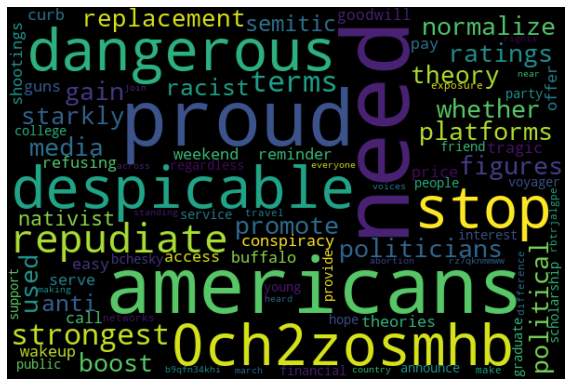

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words_lem = " ".join(sent for sent in df['text_string_fdist'])
wordcloud = WordCloud(width = 600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
